In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import *
from models import *
from optimizers import *
from utils import *
from settings import *

In [ ]:
path = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-letters-train.csv'

In [3]:
data = np.array(pd.read_csv(path))

In [4]:
x_data = data[:, 1:].reshape(-1, 28, 28).transpose(0, 2, 1).reshape(-1, 28*28) / 127.5 - 1
y_data = one_hot(data[:, 0], len(MayusLetterITOS)+1)[:, 1:]

In [5]:
print(x_data.shape, y_data.shape)

(88799, 784) (88799, 26)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


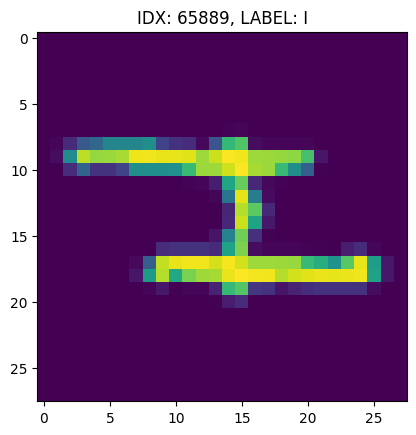

In [6]:
random_idx = np.random.randint(0, x_data.shape[0])
print(y_data[random_idx])
plt.imshow(x_data[random_idx].reshape(28, 28))
plt.title(f"IDX: {random_idx}, LABEL: {MayusLetterITOS[np.argmax(y_data[random_idx])]}")
plt.show()

In [7]:
cGAN = ConditionalGAN(
    generator=Generator(z_dim=128, n_classes=y_data.shape[1], out_dim=x_data.shape[1], dtype=DTYPE, name='Letter Generator'),
    discriminator=Discriminator(inp_dim=x_data.shape[1], n_classes=y_data.shape[1], dtype=DTYPE, name='Letter Discriminator'),
    name='Letter conditionalGAN'
)

cGAN.compile(
    optimizer_generator=Adam(lr=0.001, betas=(0.5, 0.999)),
    optimizer_discriminator=Adam(lr=0.001, betas=(0.5, 0.999))
)

In [ ]:
cGAN.make_grafical_follow(num_images=32, imgs_path=r'C:\Users\nacho\Desktop\myGithub\Projects\Image-Text-Generator-with-numpy\images')

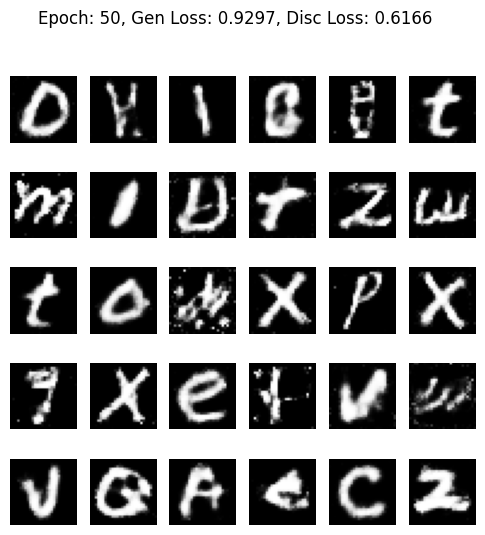

Letter conditionalGAN -> time: (165.34 sec) G Loss: 0.9297, D Loss: 0.6166


In [9]:
cGAN.train(
    x=x_data,
    y=y_data,
    epochs=50,
    batch_size=256,
    d_steps=1,
    g_steps=2,
    alpha=0.95,
    beta=1,
    verbose=True,
    debug=False
)

(1, 128) (1, 26)


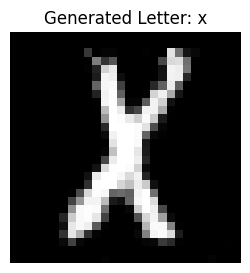

In [16]:
letter = 'x'
noise, token = np.random.standard_normal(size=(1, cGAN.generator.z_dim)), one_hot(np.array([[MinusLetterSTOI[letter]]]), len(MinusLetterSTOI))
print(noise.shape, token.shape)
generated_letter = cGAN.generator.forward(noise, token)

plt.figure(figsize=(3, 3))
plt.title(f'Generated Letter: {letter}')
plt.imshow(generated_letter[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
cGAN.save_models(
    path_gen=r'\Image-Text-Generator-with-numpy\models\letter_generator.ot',
    path_disc=r'\Image-Text-Generator-with-numpy\models\letter_discriminator.ot'
)

In [ ]:
make_gif(cGAN.imgs_path)